In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
Heart = pd.read_excel('E:\JP\heart.xlsx')
Heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
Heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
Heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:xlabel='HeartDisease2', ylabel='count'>

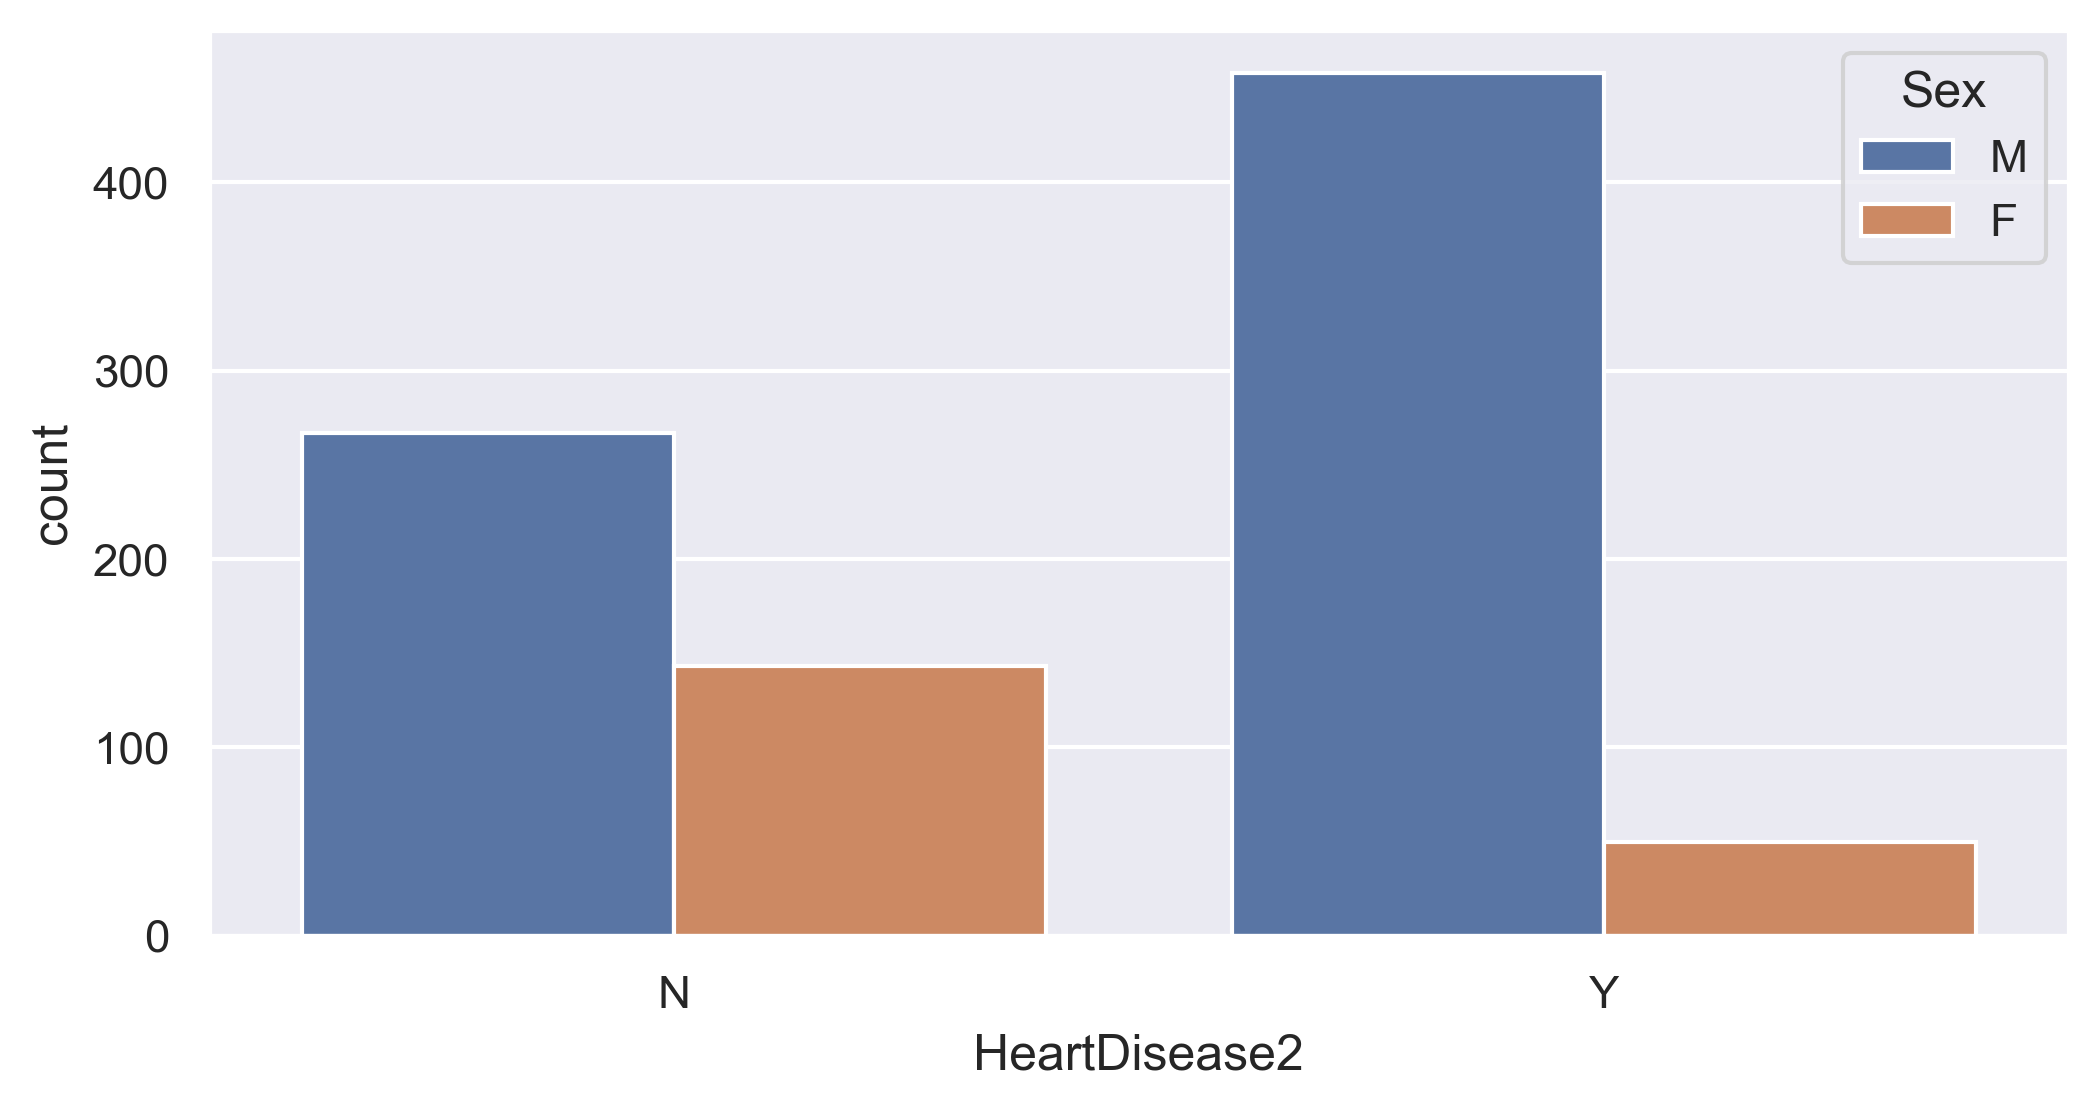

In [5]:
import numpy as np
plt.figure(figsize=(8, 4), dpi=300)
Heart['HeartDisease2'] = Heart.HeartDisease.map({0 : 'N', 1: 'Y'})
sns.countplot(x= 'HeartDisease2', hue='Sex', data=Heart)

<AxesSubplot:>

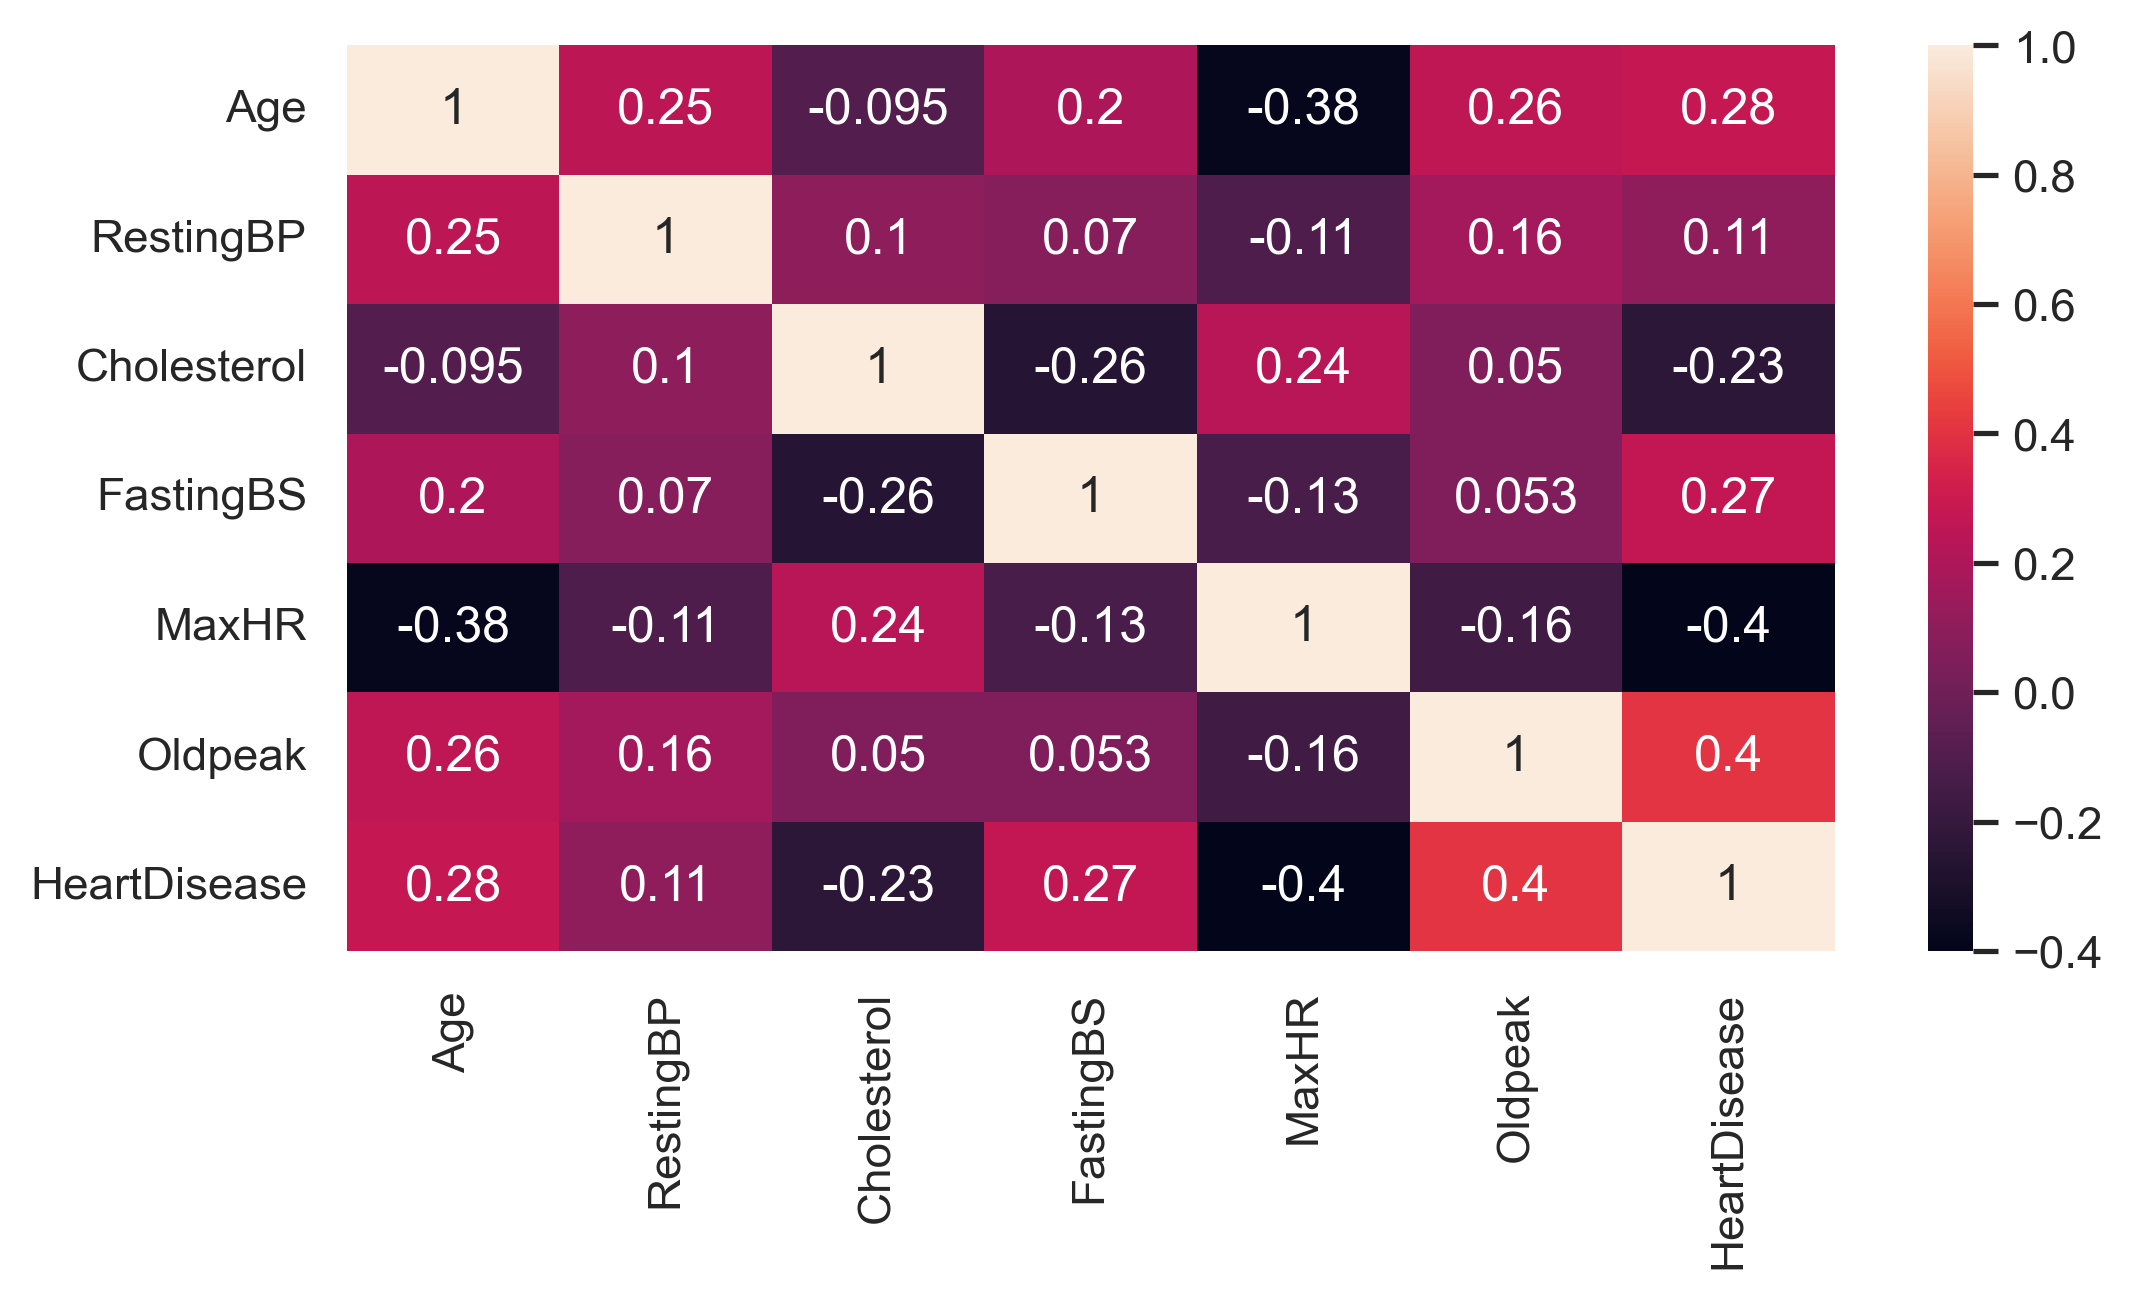

In [6]:
plt.figure(figsize=(8, 4), dpi=300)
sns.heatmap(Heart.corr('pearson'), annot=True)

C:\Users\ANONGMEDIA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ANONGMEDIA\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

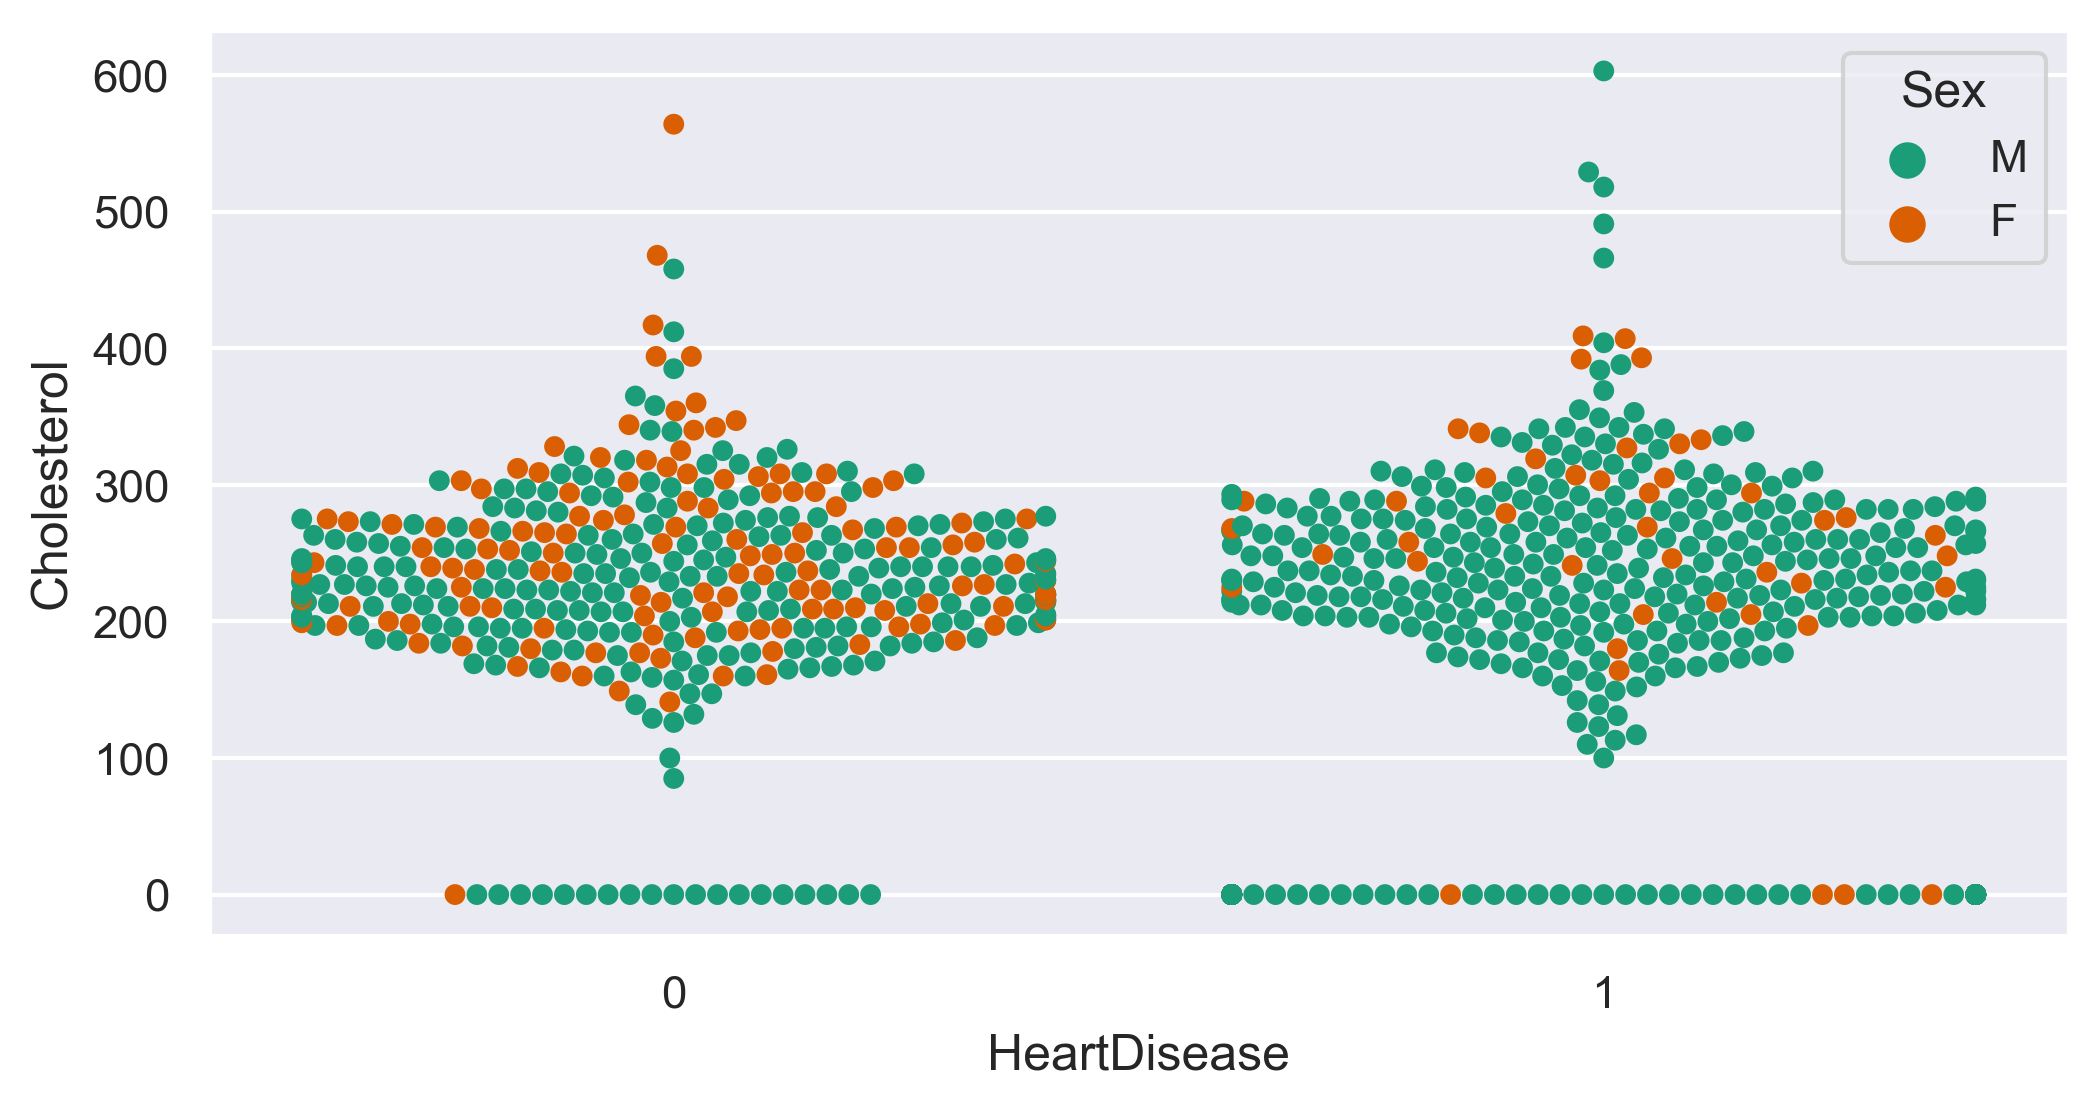

In [7]:
plt.figure(figsize=(8, 4), dpi=300)
sns.swarmplot(x='HeartDisease', y='Cholesterol', hue='Sex', data=Heart, palette='Dark2')

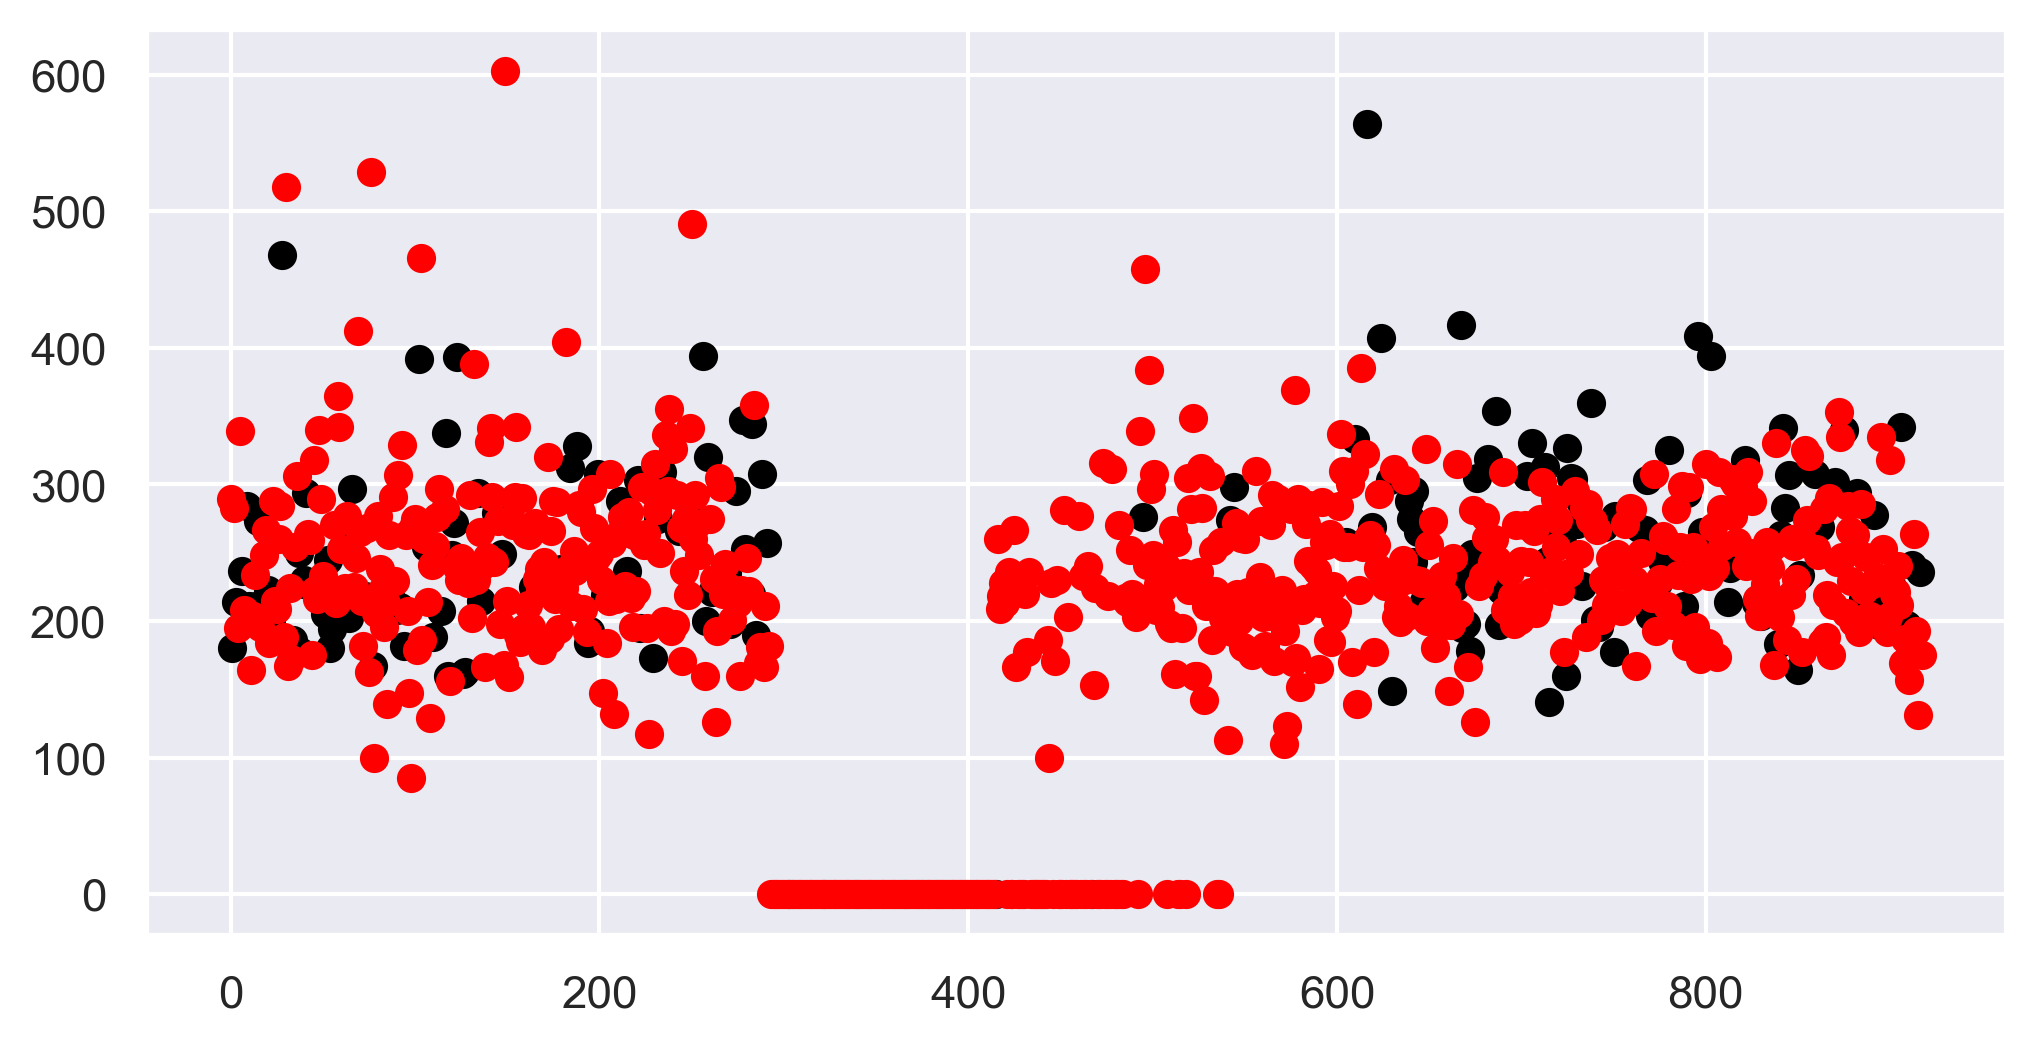

In [8]:
plt.figure(figsize=(8, 4), dpi=300)
plt.scatter(x=Heart[Heart['Sex']=='F']['Cholesterol'].index, y=Heart[Heart['Sex']=='F']['Cholesterol'], c='black')
plt.scatter(x=Heart[Heart['Sex']=='M']['Cholesterol'].index, y=Heart[Heart['Sex']=='M']['Cholesterol'], c='red')

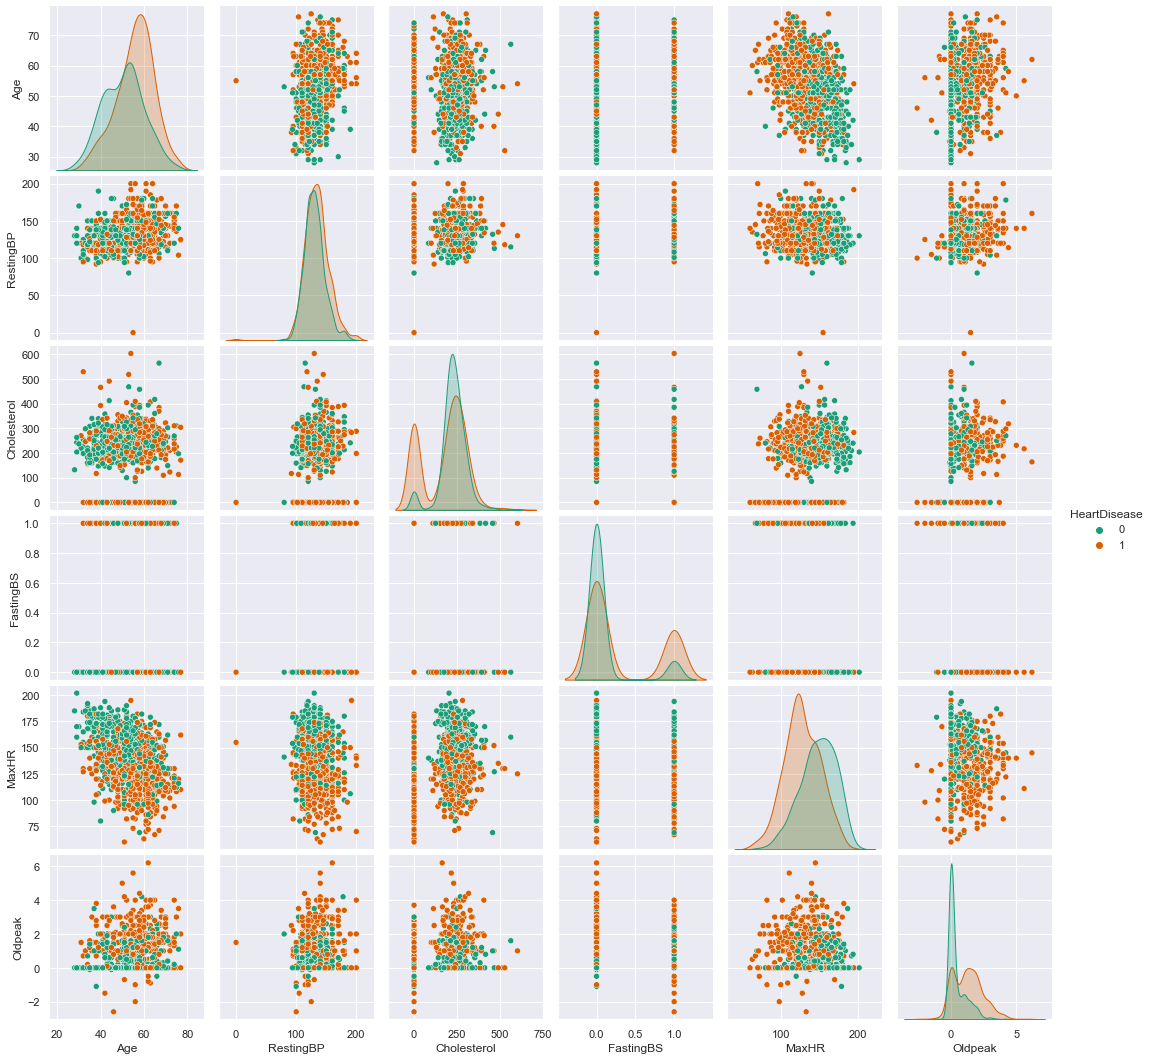

In [9]:
sns.pairplot(Heart, hue='HeartDisease', palette='Dark2')

In [10]:
import warnings
from sklearn.exceptions import ConvergenceWarning
# Menonaktifkan warning ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Menonaktifkan warning UserWarning tentang nama fitur yang tidak valid
warnings.filterwarnings('ignore', category=UserWarning)

Heart['Sex'] = Heart.Sex.map({'M':0, 'F':1})
Heart['ChestPainType'] = Heart.ChestPainType.map({'ATA': 0, 'NAP': 1, 'ASY': 2, 'TA': 3})
Heart['RestingECG'] =Heart.RestingECG.map({'Normal': 0, 'ST': 1, 'LVH': 2})
Heart['ExerciseAngina'] = Heart.ExerciseAngina.map({'N': 0, 'Y':1})
Heart['ST_Slope'] = Heart.ST_Slope.map({'Up': 0, 'Flat':1, 'Down':2})
Heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,HeartDisease2
0,40,0,0,140,289,0,0,172,0,0.0,0,0,N
1,49,1,1,160,180,0,0,156,0,1.0,1,1,Y
2,37,0,0,130,283,0,1,98,0,0.0,0,0,N
3,48,1,2,138,214,0,0,108,1,1.5,1,1,Y
4,54,0,1,150,195,0,0,122,0,0.0,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1,Y
914,68,0,2,144,193,1,0,141,0,3.4,1,1,Y
915,57,0,2,130,131,0,0,115,1,1.2,1,1,Y
916,57,1,0,130,236,0,2,174,0,0.0,1,1,Y


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
# Membagi data menjadi data latih dan data uji
x = Heart.drop(['HeartDisease', 'HeartDisease2'], axis=1)
y = Heart['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Melatih model logistik regresi
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
# Menggunakan model untuk memprediksi data uji
y_pred = logistic_regression.predict(x_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print('Akurasi model:', accuracy)

Akurasi model: 0.8478260869565217


In [13]:
# Simulasi
data = [[45, 0, 3, 110, 264, 0, 0, 132, 0, 1.2, 1], [45,0, 3, 110, 264, 0, 0, 132, 0, 1.2, 1]]
prediksi = logistic_regression.predict(data)
prediksi

array([1, 1], dtype=int64)

#
berdasarkan pada training test dibawah 

tahapan awal ditetapkan data yang akan menjadi data fiture/explanatory variabel yatu  ""x""  terhadap data output/label/target/ respon variabel yaitu  ""y"", 

kemudian dari kedua data terdebut dipecah kedalamm dua jenis data yaitu ""data training"" == (x_train, y_train) dan ""data testting"" == (x_test, y_test) dengan perbandingan data train dan test yaitu 7:3 (pada test_size = 0.3),  

tahapan selanjutnya yaitu melatih data dengan menggunakan model (disini model yang diigunakan adlah logistik regresi))dengan menggunakan ""data training"" == (x_train, y_train) yang telah diperoleh sebelumnya. proses pelatihan kemudian disimpan kedalam variabel logistic_regression3 (sebagai model)

tahapan selanjjutnya adalah memprediksi data uji atau data testting dengan memanfaatkan model yang telah di latih (training). sehingga dari proses prediksi menggunakan data input/explanatori variabel == x_test maka akan didapatkan nilai prediksi output yaitu == y_pred

tahapan terakhir adalah membandingkan/menghitung akurasi nilai antara nilai prediksi output == y_pred dengan nilai output test == y_test 

NOTE : input awal x menjadi dua input yaitu x_train dan x_test
       output awal y menjadi dua output yaitu y_train dan y_test.
       y_pred berbeda dengan y_teset, dimana y_pred merupakan nilai prediksi dari x_test sedangkan y_test merupakan nilai 
       dari 30% y